<img src='./img/logo.png'><br>
* ref : https://www.kaggle.com/smid80/weatherww2

* ref : https://leedakyeong.tistory.com/entry/Python-%EB%82%A0%EC%94%A8-%EC%8B%9C%EA%B3%84%EC%97%B4-%EB%8D%B0%EC%9D%B4%ED%84%B0Kaggle%EB%A1%9C-ARIMA-%EC%A0%81%EC%9A%A9%ED%95%98%EA%B8%B0?category=854707

# imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt; plt.style.use('ggplot') 
import warnings; warnings.filterwarnings("ignore") 

from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', None)

# read

In [2]:
w2 = pd.read_csv(
    './input/Summary of Weather.csv', 
    sep=',',
    header=0, 
    usecols=['Date', 'MeanTemp', 'STA'], 
    index_col='Date', 
    parse_dates=['Date'], 
    dtype={'MeanTemp':float}
)

In [3]:
w2.head()

,STA,MeanTemp
Date,,
1942-07-01,10001,23.888889
1942-07-02,10001,25.555556
1942-07-03,10001,24.444444
1942-07-04,10001,24.444444
1942-07-05,10001,24.444444


In [4]:
w2['STA'].unique()

array([10001, 10002, 10101, 10102, 10502, 10505, 10701, 10703, 10704,
       10705, 10718, 10802, 10803, 10804, 10806, 10807, 11101, 11103,
       11501, 11601, 11604, 11606, 11610, 11615, 11701, 11704, 11801,
       11901, 11902, 12001, 12101, 12701, 12702, 12706, 12801, 13002,
       13005, 13007, 13013, 13201, 13601, 15027, 16101, 16201, 16202,
       16405, 16407, 16504, 20501, 20602, 21501, 22502, 22504, 22507,
       22508, 22509, 30001, 31001, 31101, 31302, 31401, 31501, 31701,
       32301, 32501, 32503, 32504, 32601, 32602, 32603, 32701, 32702,
       32801, 32803, 32805, 32812, 32815, 32904, 32906, 32907, 33003,
       33013, 33014, 33019, 33023, 33031, 33044, 33109, 33111, 33117,
       33121, 33123, 33205, 33206, 33303, 33305, 33307, 33401, 33405,
       33406, 33501, 34002, 34003, 34005, 34012, 34013, 34017, 34018,
       34022, 34101, 34104, 34105, 34109, 34111, 34113, 34123, 34139,
       34147, 34150, 40601, 41204, 41207, 42204, 42206, 42401, 43201,
       43302, 43305,

In [5]:
w2.groupby('STA').count().sort_values('MeanTemp').head()

,MeanTemp
STA,
33121,13
34101,31
43307,46
33123,47
42206,50


In [6]:
df = w2[w2['STA'] == 33401].copy()
df.head()

,STA,MeanTemp
Date,,
1943-12-01,33401,18.888889
1943-12-02,33401,19.444444
1943-12-03,33401,21.111111
1943-12-04,33401,18.888889
1943-12-05,33401,16.666667


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 1943-12-01 to 1945-12-23
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STA       752 non-null    int64  
 1   MeanTemp  752 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 17.6 KB


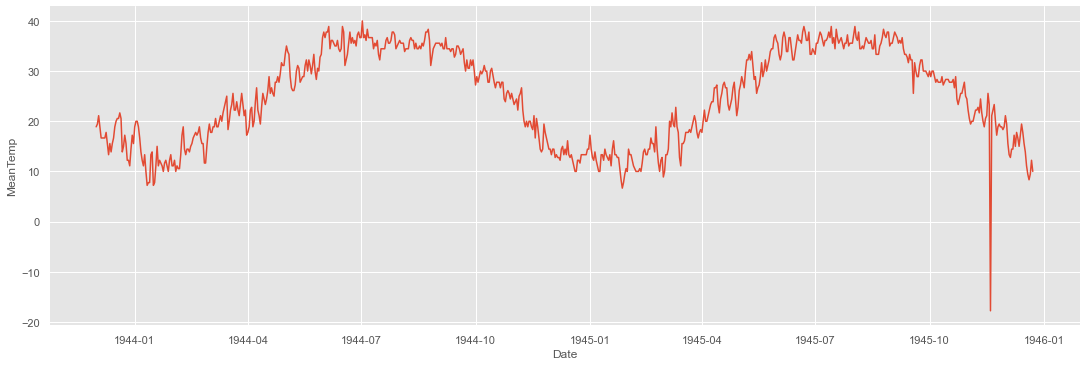

In [8]:
sns.relplot(data=df, x='Date', y='MeanTemp', kind='line', aspect=3)

# 시계열 분해

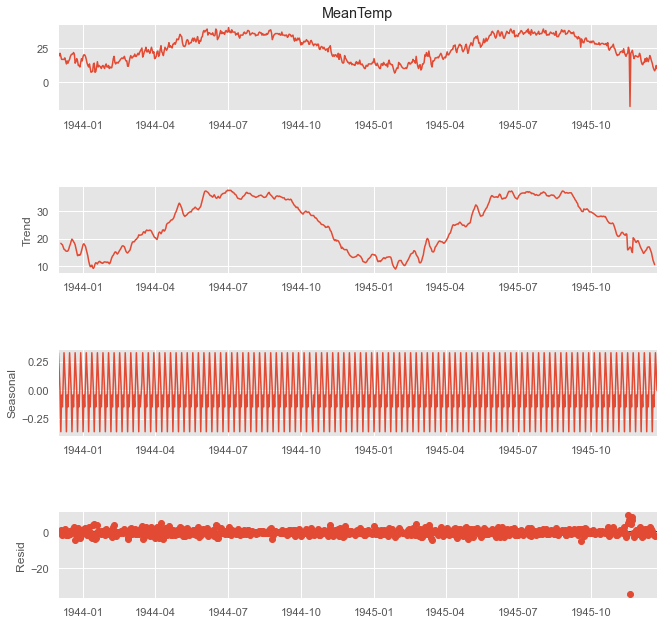

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig = seasonal_decompose(df['MeanTemp'], model='additive', freq=7).plot()
fig.set_size_inches(10, 10); plt.show()

# 정상성 확인

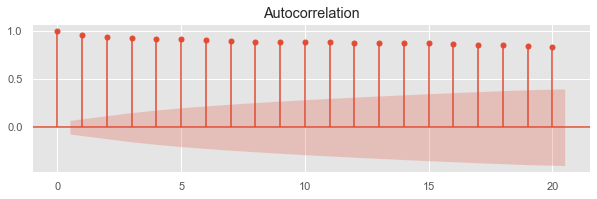

In [10]:
# ACF 검정
import statsmodels.api as sm

f  = plt.figure(figsize=(10, 6))
ax = f.add_subplot(211)
sm.graphics.tsa.plot_acf(df['MeanTemp'], lags=20, ax=ax); plt.show()

In [11]:
# ADF 검정
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['MeanTemp'])
print('ADF Statistic   :', result[0])
print('p-value         :', result[1]) # 정상성 불만족
print('Critical Values :', result[4])

ADF Statistic   : -1.063190652902712
p-value         : 0.7295256931442776
Critical Values : {'1%': -3.4393273074073045, '5%': -2.8655019247555154, '10%': -2.568879771109793}


# 1차 차분

In [12]:
df_diff = df['MeanTemp'] - df['MeanTemp'].shift()
df_diff

Date
1943-12-01         NaN
1943-12-02    0.555556
1943-12-03    1.666667
1943-12-04   -2.222222
1943-12-05   -2.222222
                ...   
1945-12-19   -1.666667
1945-12-20   -1.111111
1945-12-21    1.111111
1945-12-22    2.777778
1945-12-23   -2.222222
Name: MeanTemp, Length: 752, dtype: float64

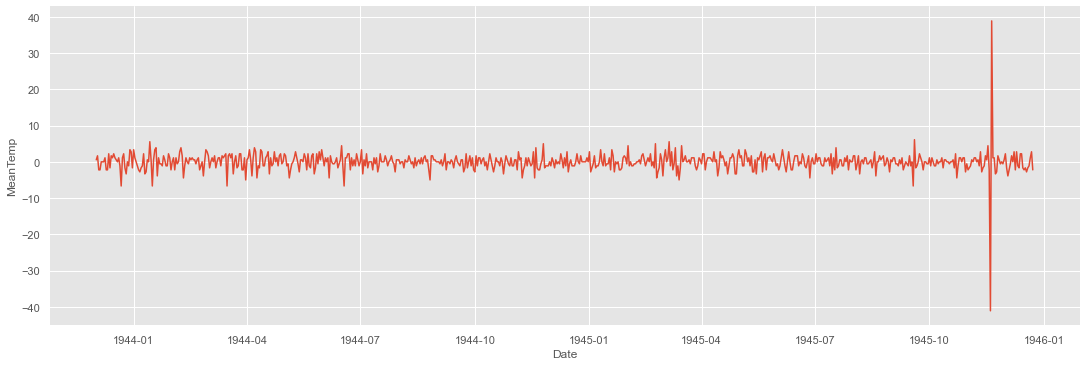

In [13]:
sns.relplot(data=df_diff, kind='line', aspect=3) # 정상성 만족

In [14]:
result = adfuller(df_diff[1:])
print('ADF Statistic   :', result[0])
print('p-value         :', result[1]) # 정상성 만족
print('Critical Values :', result[4])

ADF Statistic   : -5.7998240316912915
p-value         : 4.659117645518688e-07
Critical Values : {'1%': -3.4393273074073045, '5%': -2.8655019247555154, '10%': -2.568879771109793}


# ARIMA(p, 1, q) 결정

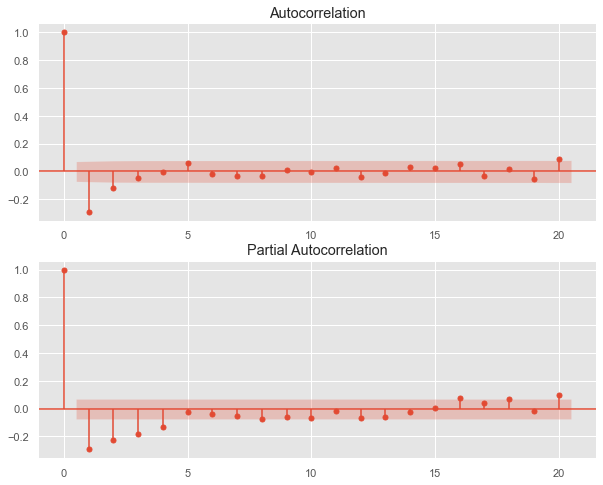

In [15]:
# 차분한 후 ARIMA(p, 1, q) 결정 : p == 4, q == 2
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_diff[1:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_diff[1:], lags=20, ax=ax2)

# ARIMA(2, 1, 2) 결과

In [16]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

model = ARIMA(df['MeanTemp'], order=(2, 1, 2))
model = model.fit(disp=0)

start_idx = datetime(1945, 4, 1)
end_idx   = datetime(1945, 12, 23)

forecast = model.predict(start=start_idx, end=end_idx, typ='levels')

f:\workspace\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
f:\workspace\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


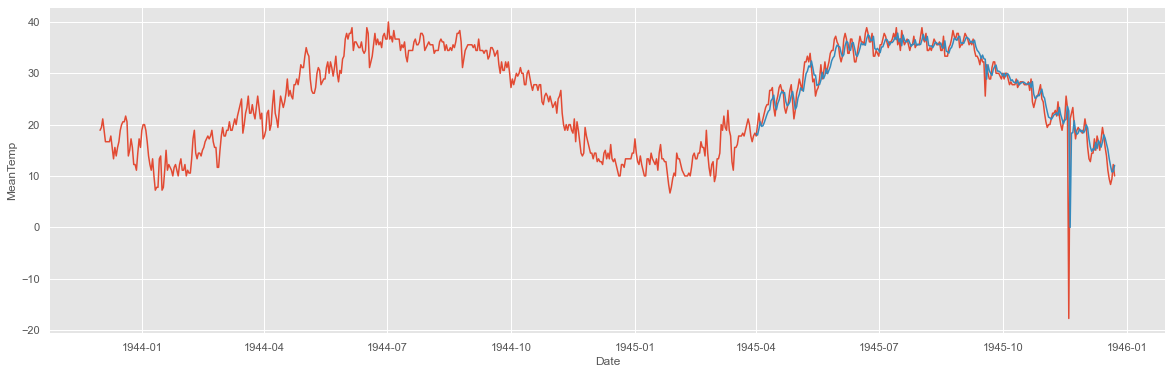

In [17]:
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['MeanTemp'], label='actual')
plt.plot(forecast, label='pred')
plt.xlabel('Date')
plt.ylabel('MeanTemp')
plt.show()

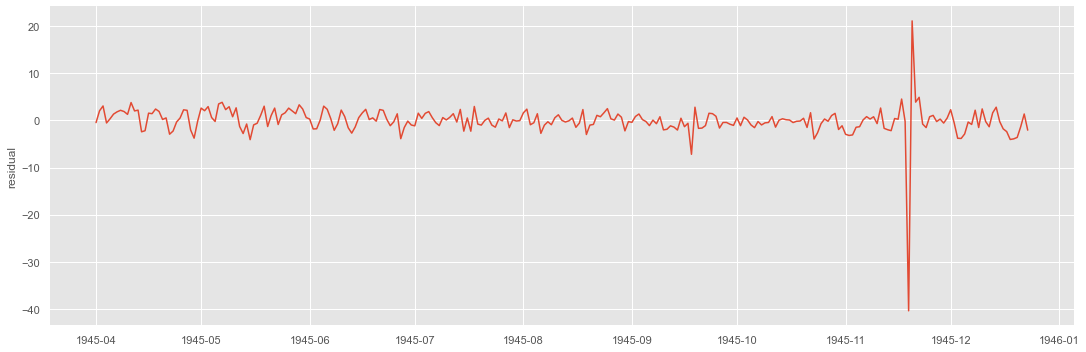

In [18]:
# 잔차 확인
residual = np.array(df.loc[start_idx:, 'MeanTemp']) - np.array(forecast)
residual = pd.DataFrame(residual, columns=['residual'], index=pd.date_range(start_idx, end_idx))

sns.relplot(data=residual, x=residual.index, y='residual', kind='line', aspect=3)

# ARIMA(4, 1, 2) 결과

In [19]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

model = ARIMA(df['MeanTemp'], order=(4, 1, 2))
model = model.fit(disp=0)

start_idx = datetime(1945, 4, 1)
end_idx   = datetime(1945, 12, 23)

forecast = model.predict(start=start_idx, end=end_idx, typ='levels')

f:\workspace\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
f:\workspace\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


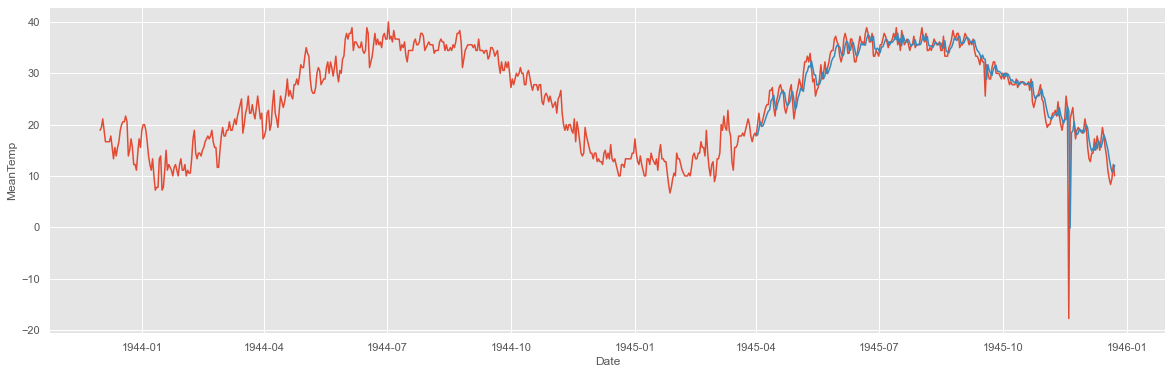

In [20]:
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['MeanTemp'], label='actual')
plt.plot(forecast, label='pred')
plt.xlabel('Date')
plt.ylabel('MeanTemp')
plt.show()

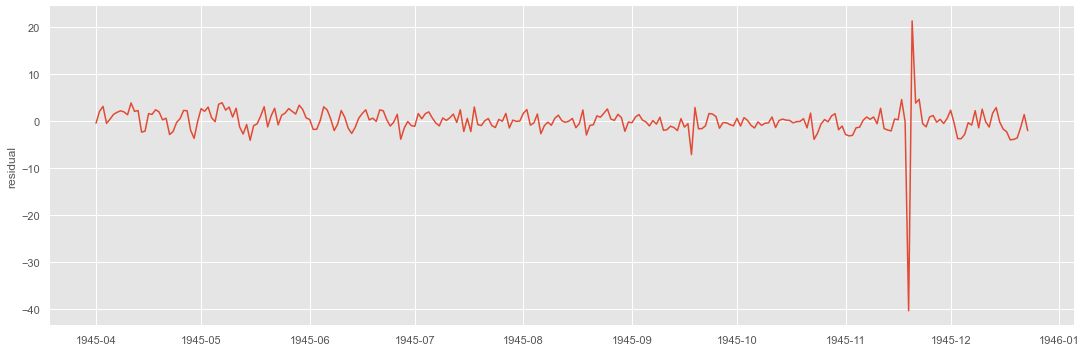

In [21]:
# 잔차 확인
residual = np.array(df.loc[start_idx:, 'MeanTemp']) - np.array(forecast)
residual = pd.DataFrame(residual, columns=['residual'], index=pd.date_range(start_idx, end_idx))

sns.relplot(data=residual, x=residual.index, y='residual', kind='line', aspect=3)